# Linear Regression in Python - Exercise

![Namespace Labs](../../../labs.png)

In [1]:
# Import pandas
# Import seaborn
# Import matplotlib
# Set the default seaborn style

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Import the housing dataset
df = pd.read_csv('/home/janusz/Desktop/udemy data science/Machine Learning/1. Linear Regression/Project/housing.csv')

In [4]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
# Check the head of the dataset


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percent lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Check the info of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
# Display a summary of the dataset


crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

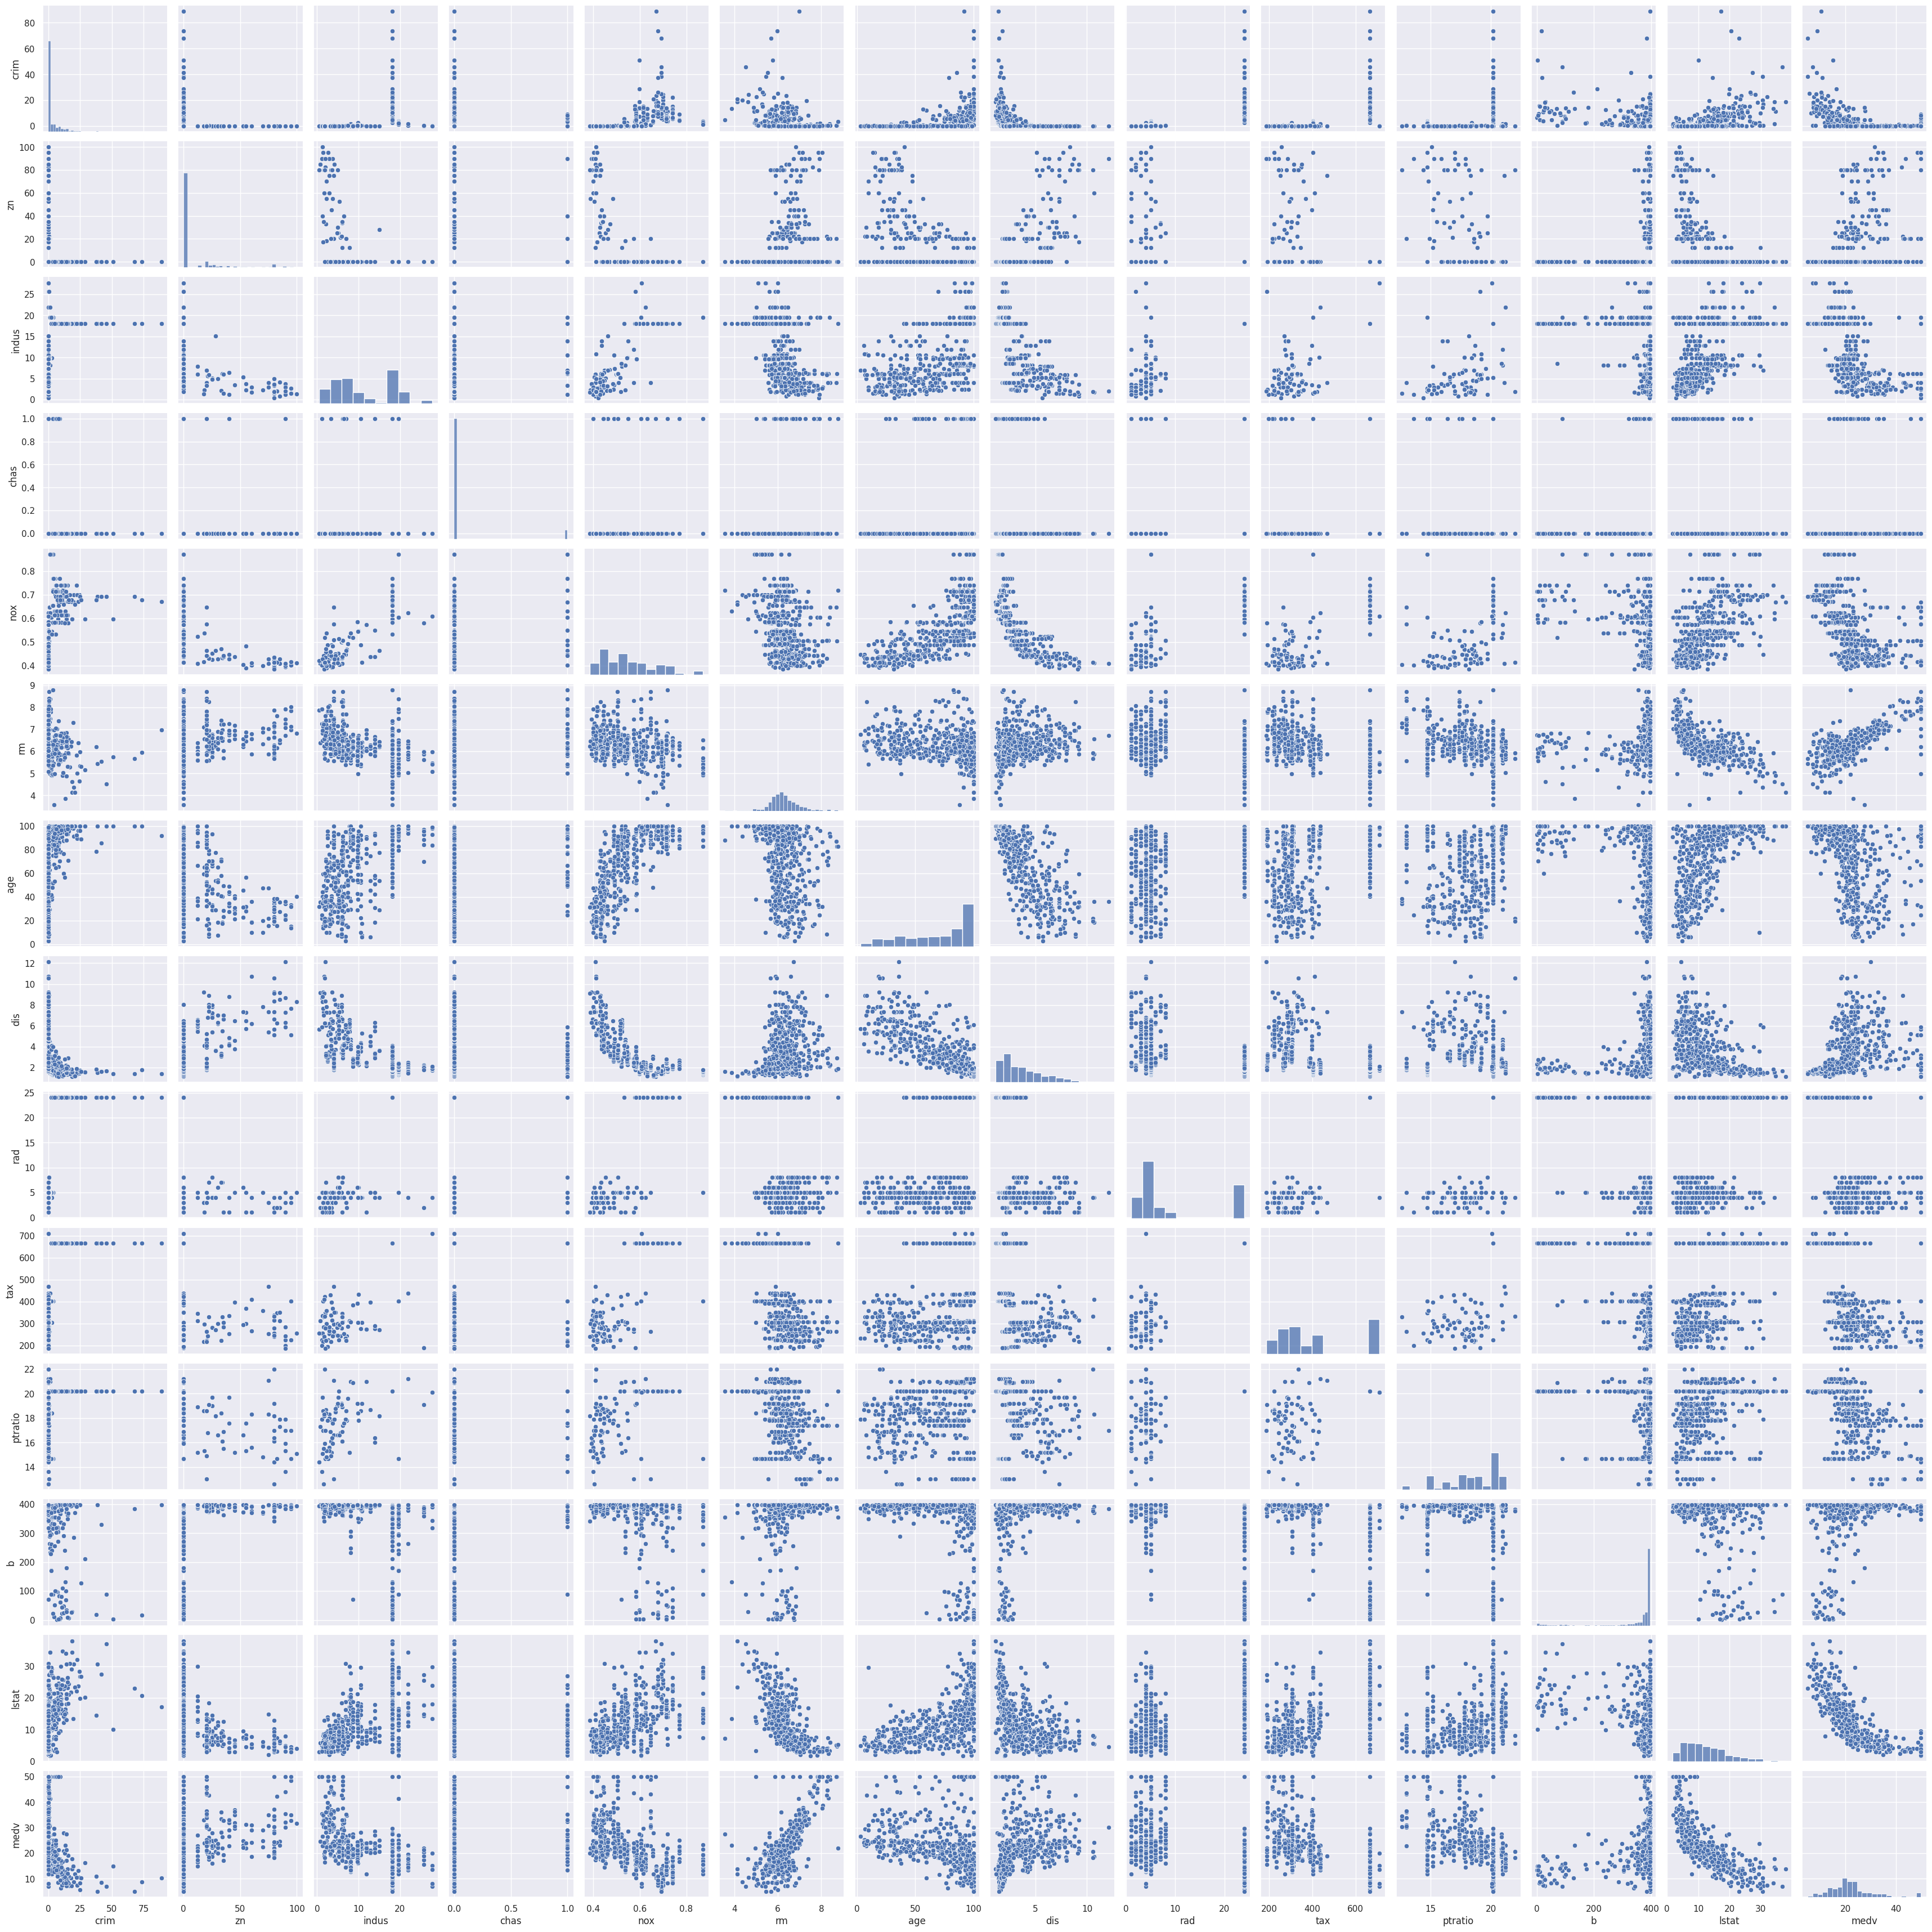

In [7]:
sns.pairplot(df)

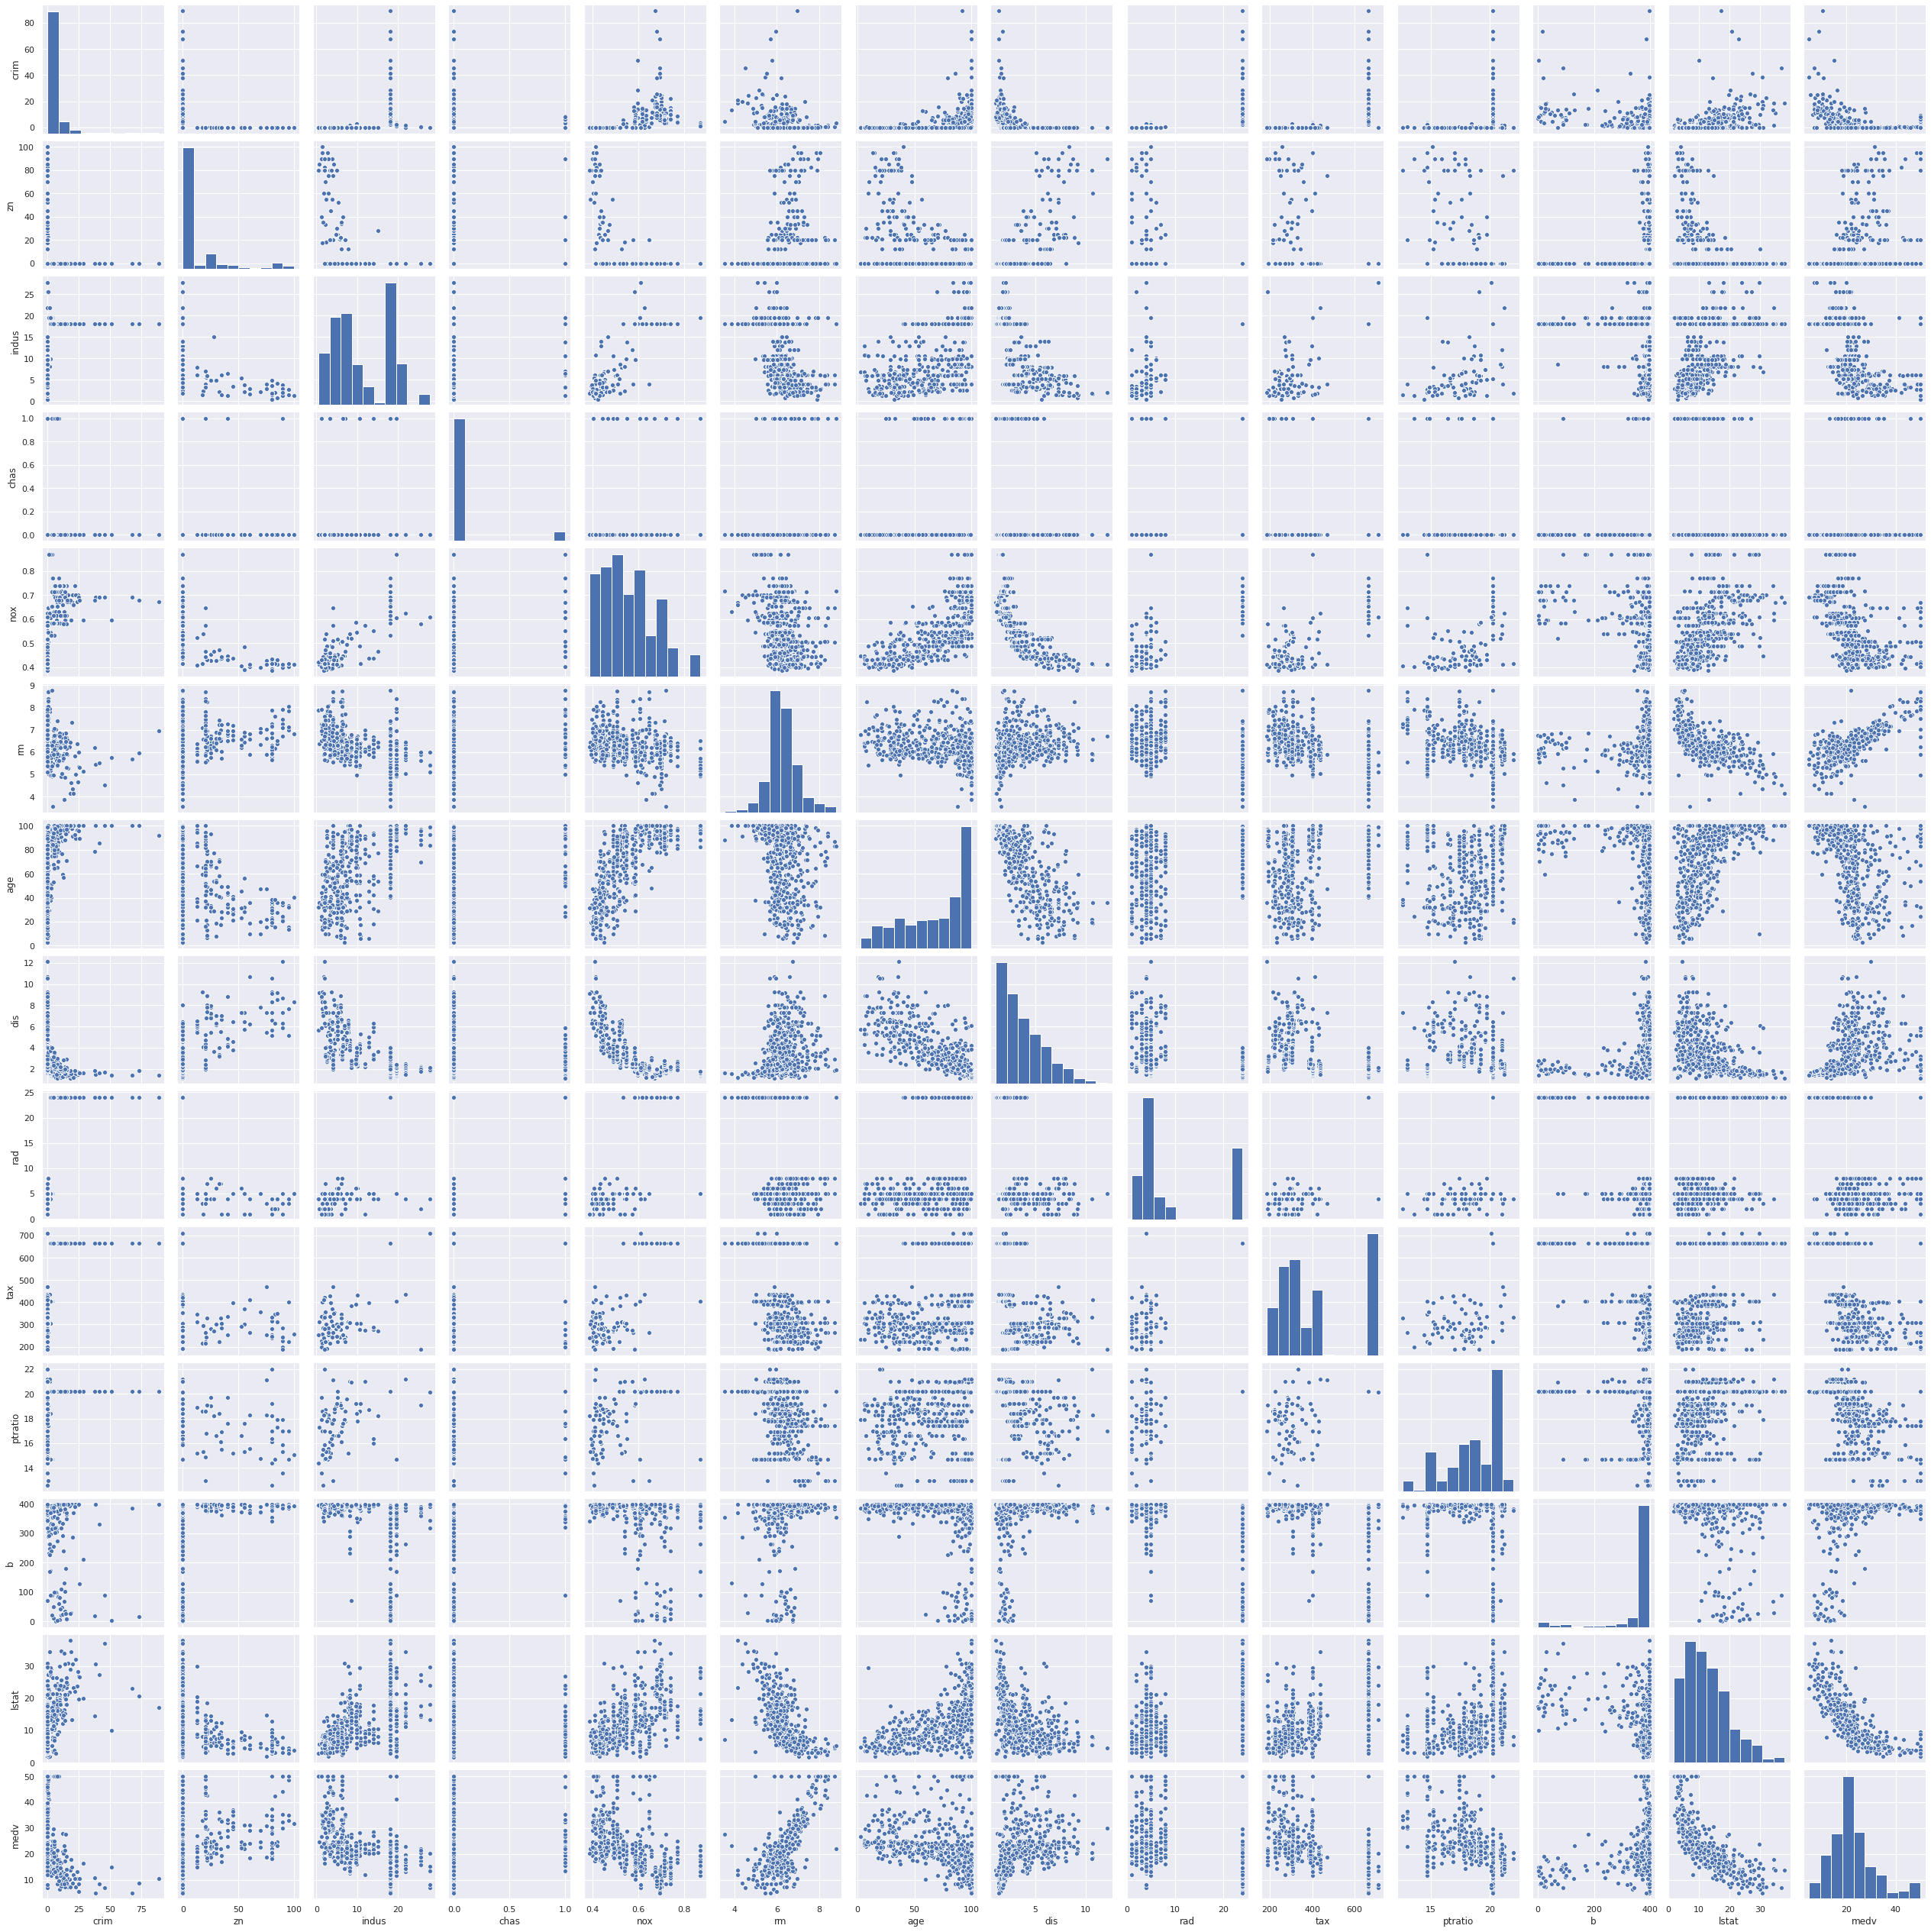

In [6]:
# Display the plot below


<Axes: xlabel='medv', ylabel='Density'>

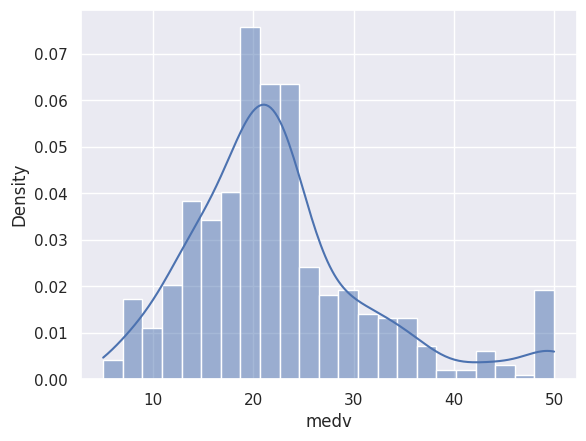

In [10]:
sns.histplot(df.medv, kde=True, stat='density')

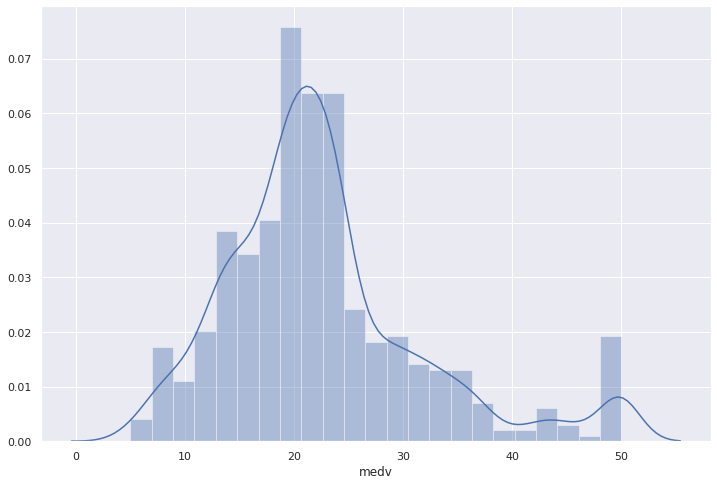

In [7]:
# Plot the distribution of the medv


In [3]:
# Create a dataframe containing correlation of the columns
df_corr = df.corr()

<Axes: >

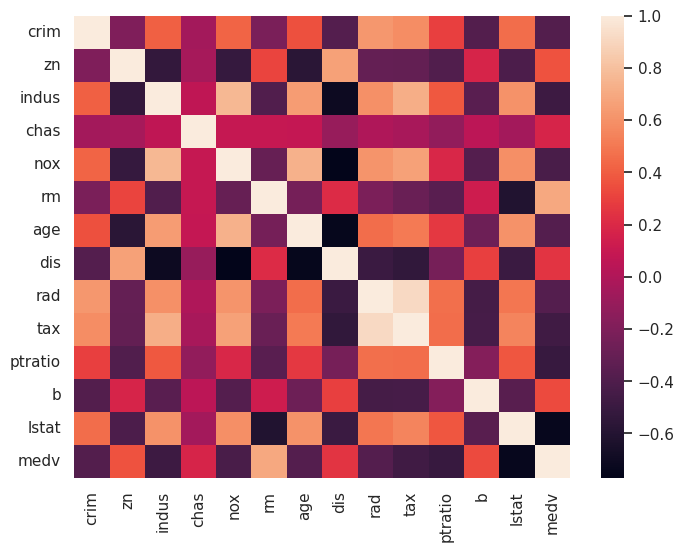

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, square=False)

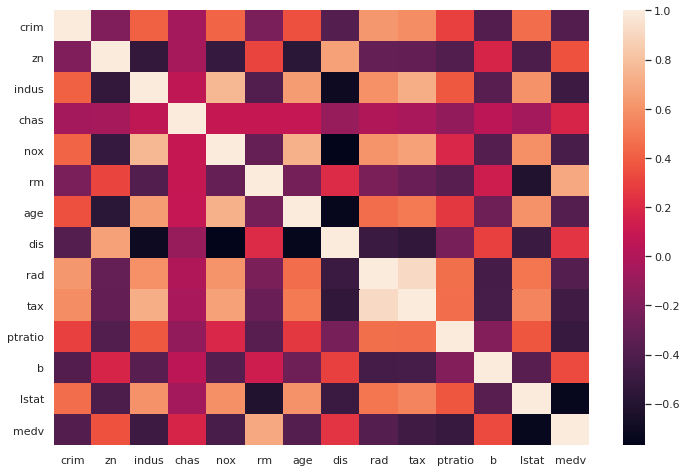

In [9]:
# Plot the correlation in a heatmap


In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [5]:
# Create the X variable
X = df.drop('medv', axis=1)

In [23]:
X.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [12]:
# Display the head of X


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [6]:
# Create the y variable
y = df.medv

In [26]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [14]:
# Display the y variable


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [7]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [9]:
# Create an instance of LinearRegression
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Fit the instantiated model to the training data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Make predictions using the test data
predictions = model.predict(X_test)

In [12]:
# Save these predictions in a dataframe
df_predictions = pd.DataFrame(predictions, columns=['Predicted medv'])

In [36]:
df_predictions.head()

Predicted medv
0       17.588209
1       24.591262
2       19.866163
3       13.497940
4       35.726962

In [21]:
# CHeck the head of the predictions dataframe


Predicted medv
0       28.534695
1       36.618701
2       15.637511
3       25.501450
4       18.709673

In [37]:
df_predictions.describe()

Predicted medv
count      127.000000
mean        23.154978
std          7.616556
min          6.114070
25%         17.521501
50%         22.022152
75%         28.530059
max         42.333193

In [22]:
# Print a summary of the predictions


Predicted medv
count      167.000000
mean        21.441396
std          7.960020
min         -6.520797
25%         16.829332
50%         21.222723
75%         25.460883
max         42.480572

In [39]:
df.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [23]:
# Print a summary of medv from the original dataframe


medv
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000

<Axes: xlabel='Predicted medv', ylabel='Density'>

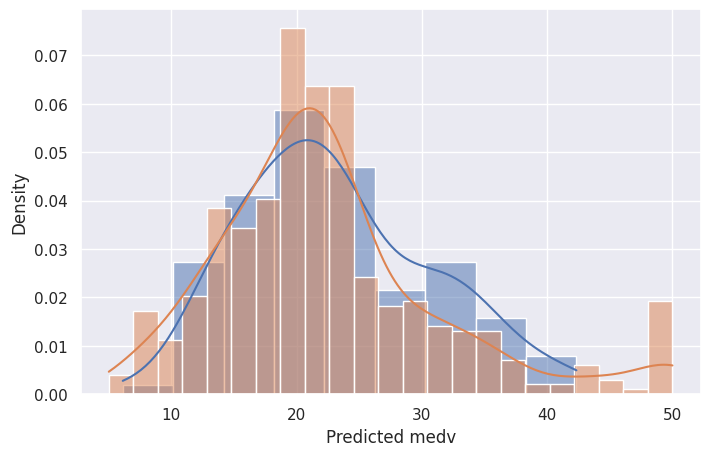

In [46]:
plt.figure(figsize = (8, 5))
sns.histplot(df_predictions['Predicted medv'], kde=True, stat='density')
sns.histplot(df.medv, kde=True, stat='density')

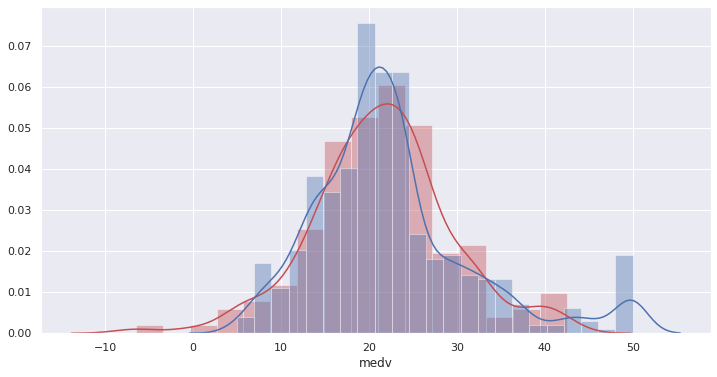

In [24]:
# Plot the distribution of medv and the predicted medv


<Axes: xlabel='medv', ylabel='Density'>

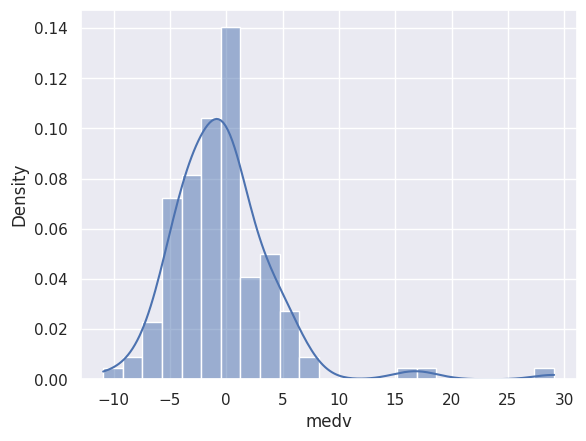

In [15]:
sns.histplot(y_test - predictions, kde=True, stat='density')

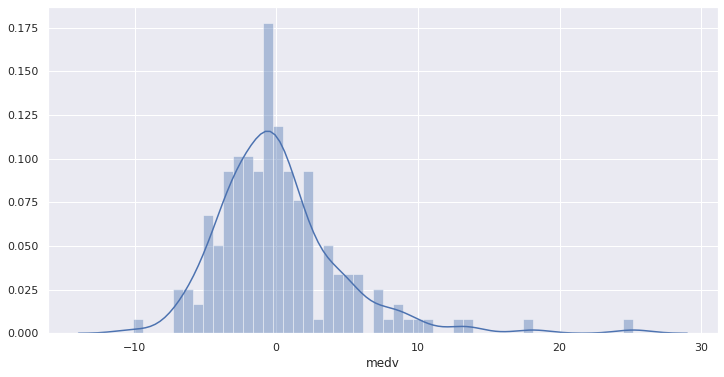

In [25]:
# Plot a graph showing the distribution of
# the difference between the predicted and the
# actual values


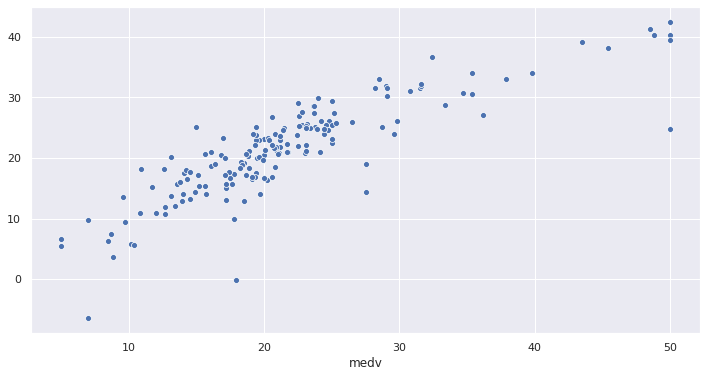

In [26]:
# Plot a scatterplot showing the distribution of
# the the predicted and the
# actual values


In [27]:
# Import metrics
# Import numpy


In [28]:
# Print the Mean Absolute Error


The Mean Absolute Error is 3.1482557548168266


In [29]:
# Print the Mean Squared Error


The Mean Squarred Error is  20.724023437339728


In [30]:
# Print the Root Mean Squared Error


Root Mean Squared Error is  4.5523645984630585


In [31]:
# Print the intercept of the model


33.33497575563628

In [32]:
# Create a variable containing the coefficients
# Display the coefficients


array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

In [33]:
# Create a datafrae containing the coefficients


In [34]:
# Displayt the dataframe


crim        zn     indus      chas        nox        rm       age  \
0 -0.12875  0.037823  0.058211  3.238668 -16.169812  3.902051 -0.012851   

        dis       rad       tax   ptratio        b     lstat  
0 -1.422224  0.234854 -0.008213 -0.928722  0.01177 -0.547566

In [35]:
# What is your interpretation of the coefficients

Happy coding!